# Konvolucija

Konvolucija se može posmatrati kao kompozicija dveju funkcije od kojih jedna predstavlja signal, a druga, obično jednostavnija, filter koji se nad tim signalom primenjuje. U kontekstu obrade slika, govori se o konvoluciji matrica. Veća matrica dimenzija $m \times n$ predstavlja signal, a filter je obično znatno manja matrica, na primer, dimenzija $3 \times 3$. Počev od gornjeg levog ugla, filter polako klizi po matrici pokrivajući uvek deo veličine $3 \times 3$. Kada stigne do kraja reda, filter se spusta red niže, a postupak se ponavlja sve dok se ne dostigne donji desni ugao (videti animaciju ispod). Rezultat primene konvolucije je, takođe, matrica čije vrednosti zavise od prirode filtera i operacije koja je vršena. Na primer, često se vrši množenje odgovarajućih elemenata, a zatim se te vrednosti sabiraju ili usrednjavaju.

Primenom filtera se obično želi realizovati unapred definisana operacija, pa tako postoje i filteri specijalno dizajnirani za različite primene. Na primer, postoji filter za detekciju ivica, filter za izoštravanje slike, filter za zamućivanje slike i slično. Ovaj princip nalazi primenu kod konvolutivnih neuronskih mreža gde se koristi na nivou konvolutivnih slojeva za detekciju odgovarajućih karakteristika. S vremenom ovaj tip mreža dobija na popularnosti i vrlo intenzivno se koristi u raznim zadacima, npr. u prepoznavanju objekata na slikama. Više o tome se može pronaći, na primer, [ovde](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

<img src="filter.gif" width="400px">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from PIL import ImageFilter

Biblioteka `PIL` i njen `ImageFilter` paket stavljaju na raspolaganje različite filtere. Neki od njih su `BLUR`, `CONTOUR`, `DETAIL`, `EDGE_ENHANCE`, `EDGE_ENHANCE_MORE`, `EMBOSS`, `FIND_EDGES`, `SHARPEN`, `SMOOTH` i `SMOOTH_MORE`. Na primer, filter `EMBOSS` je filter koji se koristi za vizuelizaciju stepena promene boja u svakom pikselu slike.   Nakon primene ovog filtera, dobijaju se slike nalik gravurama, pa zato nosi i ovakvo ime. Funkcija kojom se može primeniti neki filter (izvršiti konvolucija) je `filter`.

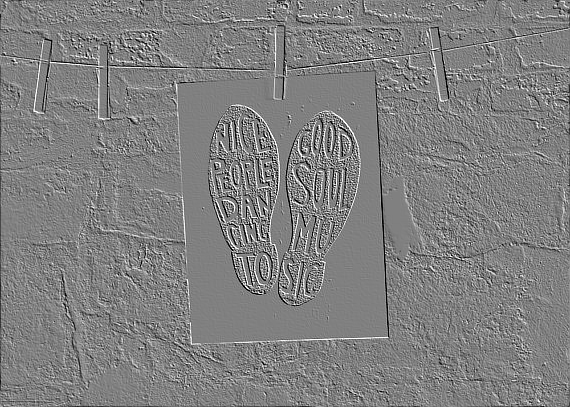

In [3]:
img = Image.open('assets/slika.jpg').convert('L')
img_filtered = img.filter(ImageFilter.EMBOSS)
img_filtered

Možete eksperimentisati i sa drugim filterima i njihovim rezultatima. 

Dalje ćemo konstruisati tri slike predstavljene odgovarajućim *numpy* matricama dimenzija $2 \times 2$. Svojstva koje slike treba da zadovolje su:

* Prva slika traba da ima sve elemente jednake, odnosno, traba da bude jednobojna. 
* Druga slika treba da ima jednake vrednosti u prvom i jednake vrednosti u drugom redu, odnosno traba da ima dve boje i horizontalnu ivicu.
* Treća slika traba da ima jednake vrednosti u prvoj i jednake vrednosti u drugoj koloni, odnosno traba da ima dve boje i vertikalnu ivicu.

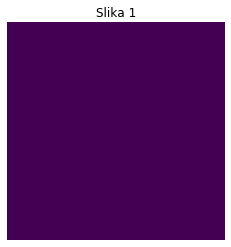

In [4]:
img1 = np.array([[1, 1], [1, 1]])
plt.imshow(img1)
plt.axis('off')
plt.title('Slika 1')
plt.show()

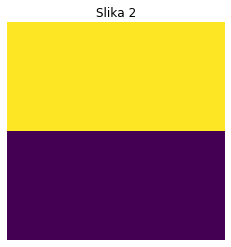

In [5]:
img2 = np.array([[1, 1], [0, 0]])
plt.imshow(img2)
plt.axis('off')
plt.title('Slika 2')
plt.show()

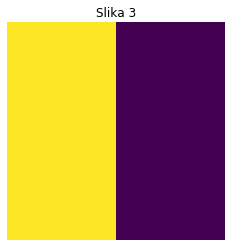

In [6]:
img3 = np.array([[1, 0], [1, 0]])
plt.imshow(img3)
plt.axis('off')
plt.title('Slika 3')
plt.show()

Filteri sa kojima ćemo raditi će biti predstavljeni, takođe, matricama $2 \times 2$. `hfilter` je u mogućnosti da prepoznaje horizontalne ivice. Zbog toga on ima pozitivne vrednosti u prvom, a negativne vrednosti u drugom redu. Filter se primenjuje tako što se njegovi elementi množe sa odgovarajućim elementima na slici, a zatim se vrši sumiranje. Ako ne postoji horizontalna ivica, vrednosti iz prvog i vrednosti iz drugog reda će u zbiru dati nulu, a ako postoji, dobiće se vrednost različita od nule. Na sličan način `vfilter` može da prepoznaje vertikalne ivice. 

In [7]:
hfilter = np.array([[1, 1], [-1, -1]])
vfilter = np.array([[1, -1], [1, -1]])

Funkcija `apply_filter` će biti funkcija koju ćemo koristit za konvoluciju. Matrice i filteri su istih dimenzija pa nas zapravo zanimaju samo povratne vrednosti i njihov znak. 

In [8]:
def apply_filter(img, filter):
    return np.sum(np.multiply(img, filter))

Kako prva slika nema ivice, primena oba filtera kao rezultat daje 0.

In [9]:
print('Horizontalna ivca za img1:', apply_filter(img1, hfilter))
print('Vertikalna ivica za img1:', apply_filter(img1, vfilter))

Horizontalna ivca za img1: 0
Vertikalna ivica za img1: 0


Druga slika sadrži horizontalnu ivicu, pa u tom slučaju `hfilter` daje ne-nula vrednost. 

In [10]:
print('Horizontalna ivca za img2:', apply_filter(img2, hfilter))
print('Vertikalna ivica za img2:', apply_filter(img2, vfilter))

Horizontalna ivca za img2: 2
Vertikalna ivica za img2: 0


Slična situacija je sa trećom slikom i vertikalnim filterom.

In [11]:
print('Vertikalna ivica za img3:', apply_filter(img3, hfilter))
print('Vertikalna ivica za img3:', apply_filter(img3, vfilter))

Vertikalna ivica za img3: 0
Vertikalna ivica za img3: 2


U praksi postoje mnoge tehnike za dizajniranje filtera i detekciju željenih svojstava.